In [2]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [3]:
# Importing the dataset
data = pd.read_csv('mallCustomerData.txt', sep=",")
print(data.shape)
data.head()

(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:

df = pd.DataFrame(data, columns= ['CustomerID','Gender', 'Age','Annual Income (k$)','Spending Score (1-100)'])
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
print(data['Gender'].value_counts())

Female    112
Male       88
Name: Gender, dtype: int64


In [6]:
data = pd.get_dummies(data,columns=['Gender'])
print(data)

     CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1   19                  15                      39   
1             2   21                  15                      81   
2             3   20                  16                       6   
3             4   23                  16                      77   
4             5   31                  17                      40   
..          ...  ...                 ...                     ...   
195         196   35                 120                      79   
196         197   45                 126                      28   
197         198   32                 126                      74   
198         199   32                 137                      18   
199         200   30                 137                      83   

     Gender_Female  Gender_Male  
0                0            1  
1                0            1  
2                1            0  
3                1            0  
4            

CustomerID
Age
Annual Income (k$)
Spending Score (1-100)
Gender_Female
Gender_Male


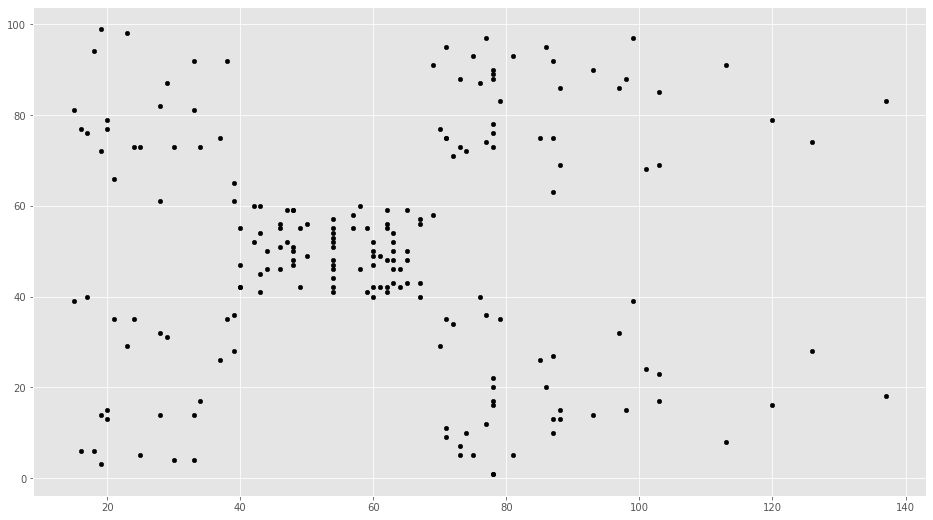

In [7]:
# Getting the values and plotting it
f1 = data['Annual Income (k$)'].values
f2 = data['Spending Score (1-100)'].values

for key in data.keys():
    print(key)
X = np.array(list(zip(f1, f2)))
#X=[[1, 1], [1, 2], [3, 3],[4,4]]
plt.scatter(f1, f2, c='black', s=20)

CustomerID
Age
Annual Income (k$)
Spending Score (1-100)
Gender_Female
Gender_Male


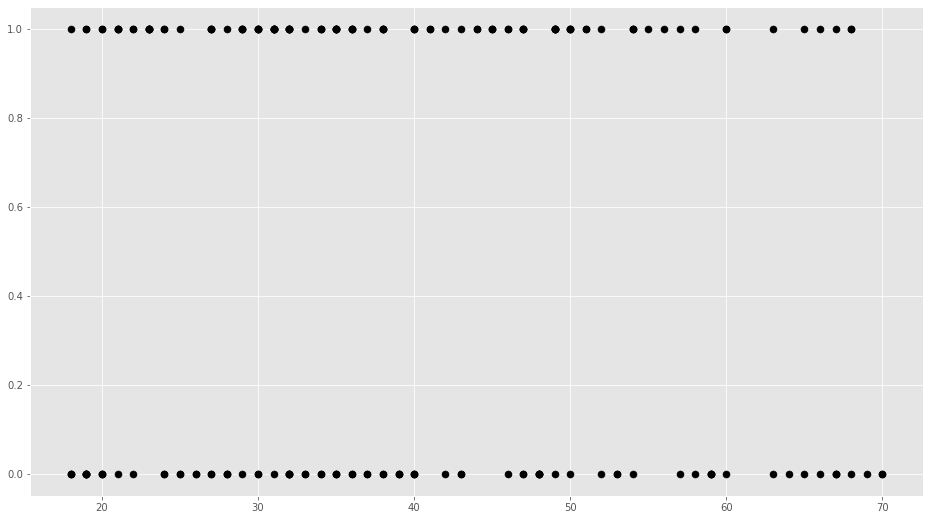

In [8]:
f3 = data['Age'].values
f4 = data['Gender_Female'].values


for key in data.keys():
    print(key)
X = np.array(list(zip(f3, f4)))
#X=[[1, 1], [1, 2], [3, 3],[4,4]]
plt.scatter(f3, f4, c='black', s=50)

CustomerID
Age
Annual Income (k$)
Spending Score (1-100)
Gender_Female
Gender_Male


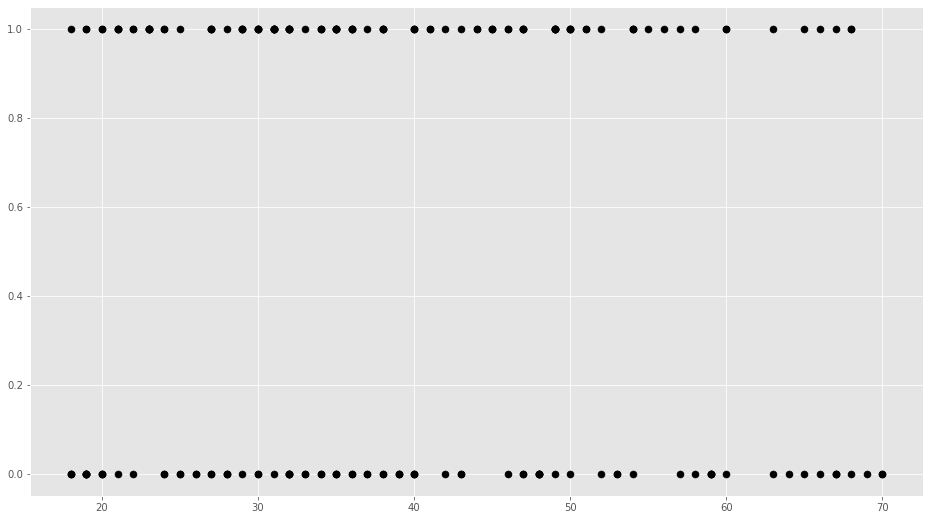

In [9]:
f3 = data['Age'].values
f5 = data['Gender_Male'].values


for key in data.keys():
    print(key)
X = np.array(list(zip(f3, f4)))
#X=[[1, 1], [1, 2], [3, 3],[4,4]]
plt.scatter(f3, f4, c='black', s=50)

In [10]:
# Number of clusters
k = 1
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-2, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-2, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[55. 42.]]


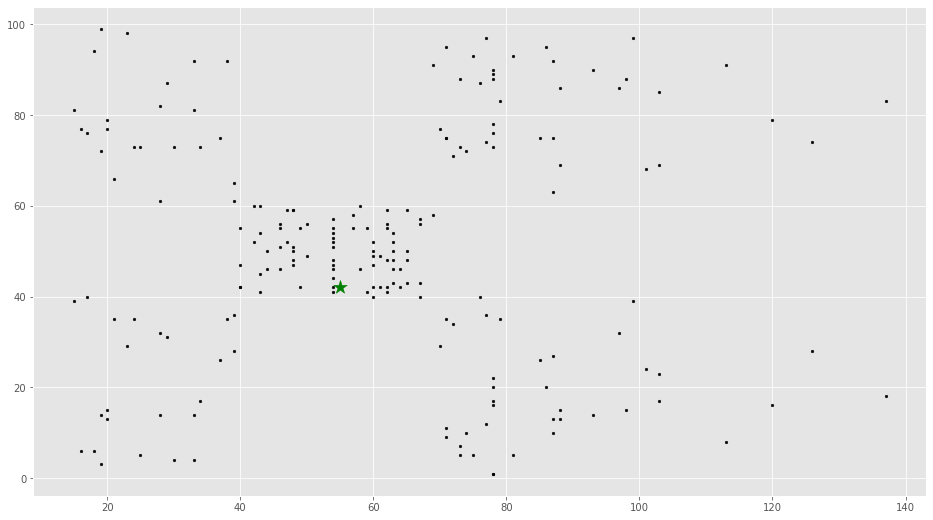

In [11]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

NameError: name 'clusters' is not defined

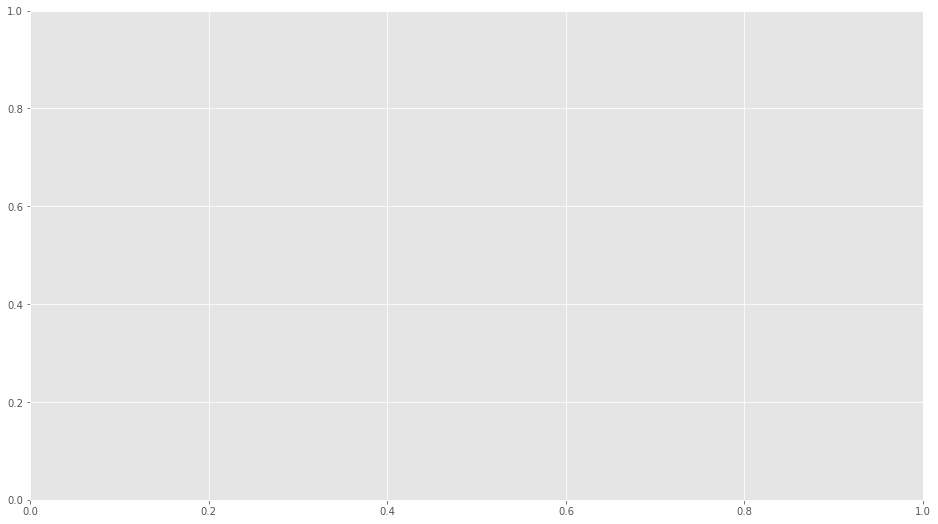

In [21]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=5, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

## The scikit-learn approach

In [13]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

In [14]:
# Comparing with scikit-learn centroids
print(C) # From Scratch
print(centroids) # From sci-kit learn

[[55. 42.]]
[[42.72        0.61333333]
 [26.4494382   0.57303371]
 [61.44444444  0.41666667]]


You can see that the centroid values are equal, but in different order.

We will generate a new dataset using make_blobs function.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = (16, 9)

# Creating a sample dataset with 4 clusters
X, y = make_blobs(n_samples=800, n_features=3, centers=4)

C:\Users\Asus\AppData\Local\Temp/ipykernel_12756/2780865410.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


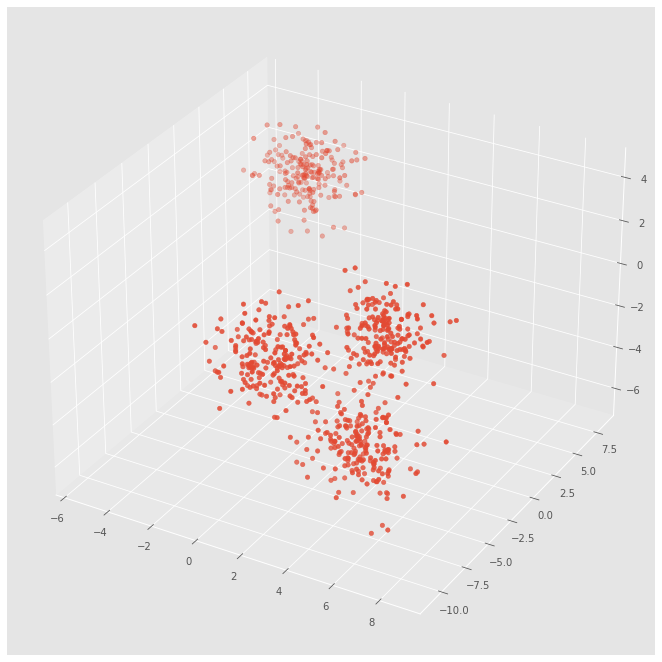

In [16]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

In [17]:
# Initializing KMeans
kmeans = KMeans(n_clusters=4)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

C:\Users\Asus\AppData\Local\Temp/ipykernel_12756/1456065186.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


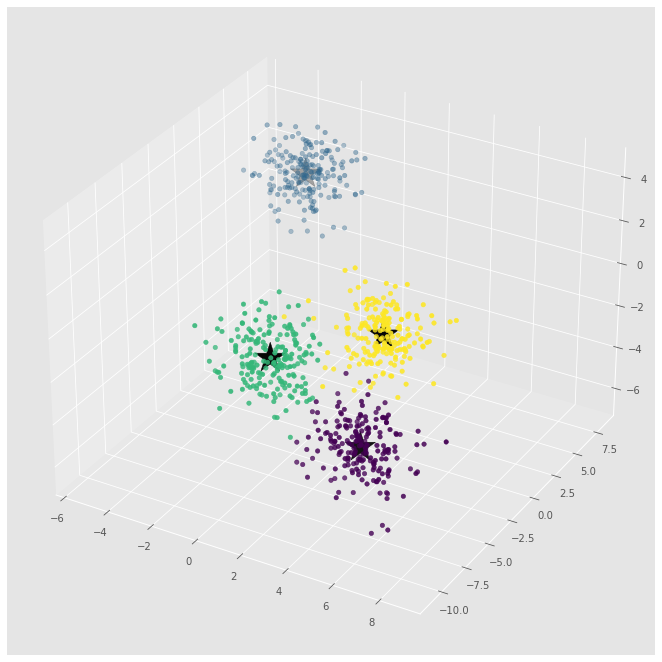

In [18]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


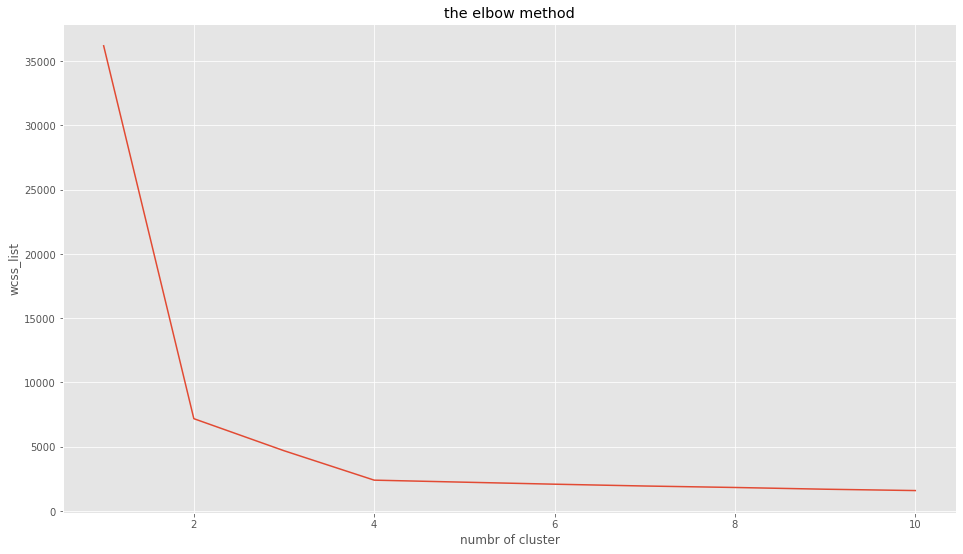

In [20]:
# Finding the optimal number of clusters using elbow method
from sklearn.cluster import KMeans
wcss_list =[] # Intializing the list for the values of WCSS

# 10 iterations
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state =42)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)

plt.plot(range(1,11),wcss_list)
plt.title("the elbow method")
plt.xlabel("numbr of cluster")
plt.ylabel("wcss_list")
plt.show()